Validation of the ML-model by evaluating a set of lactate dehydrogenases. The dataset of lactate dehydrogenases is from:
Fields, P. A.; Somero, G. N. Hot Spots in Cold Adaptation: Localized Increases in Conformational Flexibility in Lactate Dehydrogenase A4 Orthologs of Antarctic Notothenioid Fishes. Proceedings of the National Academy of Sciences 1998, 95 (19), 11476–11481. https://doi.org/10.1073/pnas.95.19.11476.


In [83]:
import glob
import uniprot
import pandas

accessionSeqSpecies=dict()
for file in glob.glob("*.fasta"):
    seqids, fastas = uniprot.read_fasta(file)
    species=fastas[seqids[0]]["description"].split("OS=")[1].split(" OX")[0]
    print(species)
    accessionSeqSpecies[seqids[0]]=[fastas[seqids[0]]["sequence"],species]


Meleagris gallopavo
Sphyraena argentea
Sphyraena lucasana
Harpagifer antarcticus
Parachaenichthys charcoti
Gobionotothen gibberifrons
Champsocephalus gunnari
Eleginops maclovinus
Dissostichus mawsoni
Lindbergichthys nudifrons
Patagonotothen tessellata
Gallus gallus
Squalus acanthias
Bos taurus
Chaenocephalus aceratus
Chionodraco rastrospinosus
Gillichthys mirabilis
Dipsosaurus dorsalis
Hippoglossus stenolepis


In [84]:
df = pandas.DataFrame.from_dict(accessionSeqSpecies,orient="index",columns=["sequence","species"])

In [85]:
len(df)

19

In [86]:
###1, P. charcoti; 2, L. nudifrons; 3, C. gunnari; 4, H.
##antarcticus; 5, P. tessellata; 6, E. maclovinus; 7, S. mystinus (rockfish);
###8, Hippoglossus stenolepis (halibut) (28); 9, Sphyraena argentea (barracuda) (18); 10, Squalus acanthias (dogfish) (28); 11, Sphyraena
###lucasana (18); 12, Gillichthys mirabilis (goby) (2); 13, Thunnus thynnus
###(bluefin tuna) (28); 14, Sphyraena ensis (18); 15, Bos taurus (cow) (28);
###16, Gallus gallus (chicken) (28); 17, Meleagris gallopavo (turkey) (28);
##18, D. dorsalis (desert iguana).
bodytemperatureCelsius=[38,19,21,0,0,0,0,6,0,0,6,38,20,38,0,0,24,42,6]
bodytemperaturesKelvin=[x+273 for x in bodytemperatureCelsius]
df["bodytemperatureKelvin"]=bodytemperaturesKelvin
df["invbodytemperatureKelvin"]=1/df["bodytemperatureKelvin"]
df

,sequence,species,bodytemperatureKelvin,invbodytemperatureKelvin
tr|G1N679,MLCTMSLKDHLIHNVHKEEHPHAHNKISVVGVGAVGMACAISILMK...,Meleagris gallopavo,311,0.003215
sp|O13276,MSTKEKLIGHVMKEEPIGSRNKVTVVGVGMVGMASAVSILLKDLCD...,Sphyraena argentea,292,0.003425
sp|O13278,MSTKEKLIDHVMKEEPIGSRNKVTVVGVGMVGMASAVSILLKDLCD...,Sphyraena lucasana,294,0.003401
sp|O93537,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILIKDLGD...,Harpagifer antarcticus,273,0.003663
sp|O93538,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Parachaenichthys charcoti,273,0.003663
sp|O93540,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Gobionotothen gibberifrons,273,0.003663
sp|O93541,MSTKEKLISHVMKEEPVGSRSKVTVVGVGMVGMASAISILLKDLCD...,Champsocephalus gunnari,273,0.003663
sp|O93542,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Eleginops maclovinus,279,0.003584
sp|O93544,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Dissostichus mawsoni,273,0.003663
sp|O93545,MSTKEKLISHVMKEEPVGSRSKVTVVGVGMVGMASAISILLKDLCD...,Lindbergichthys nudifrons,273,0.003663


In [87]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
model = keras.models.load_model("../psychornot-keras")
aa="AGSTNQVILMFYWHPKREDC" #The twenty amino acids, grouped somewhat by feature

In [88]:
def seqpair_tokenize(seq):
    #Takes a single-character protein sequence, returns a 20x20 ndarray with the frequencies of sequence neighbors 
    prev=""
    cur=""
    second=""
    aapairs=np.zeros((20,20))
    wl=1/len(seq)
    for c in seq:
        try:
            cur=aa.index(c)
        except ValueError:
            prev=""
        if prev:
            aapairs[prev,cur]+=wl
    
        prev=cur
    return aapairs


In [89]:
df["AApairs"]=df["sequence"].map(seqpair_tokenize)

In [90]:
aapairs= df["AApairs"].to_list()

In [91]:
for aapair in aapairs:
    print(model.predict((np.expand_dims(aapair,0))))

[[-0.2250725  0.1411581]]
[[ 0.08322957 -0.17477757]]
[[ 0.01360474 -0.10401617]]
[[ 0.0200838  -0.11583771]]
[[ 0.1257146  -0.22473074]]
[[ 0.03554807 -0.12817061]]
[[ 0.08216299 -0.18070889]]
[[ 0.06794763 -0.16586655]]
[[ 0.07263812 -0.17038864]]
[[ 0.09544785 -0.19350098]]
[[ 0.06861077 -0.16642441]]
[[ 0.2273654  -0.34836024]]
[[ 0.5302072 -0.6680825]]
[[ 0.15608272 -0.26806328]]
[[ 0.10280655 -0.20212932]]
[[ 0.10280655 -0.20212932]]
[[ 0.02570599 -0.11697008]]
[[ 0.11477797 -0.22042647]]
[[ 0.06237742 -0.15925442]]


In [92]:
dataset= tf.data.Dataset.from_tensor_slices(aapairs)

In [93]:
df[["MLscore1","MLscore2"]]=model.predict(np.expand_dims(df["AApairs"].to_list(),3))
df["logMLscore1"] = np.log(df["MLscore1"])
df["logMLscore2"] = np.log(df["MLscore2"])



C:\Users\blu002\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='MLscore2', ylabel='MLscore1'>

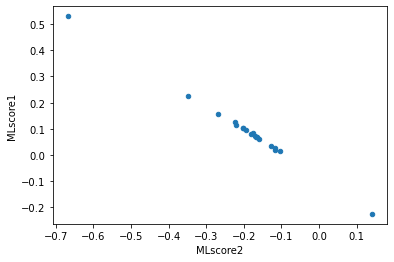

In [94]:
df.plot("MLscore2","MLscore1",kind="scatter")

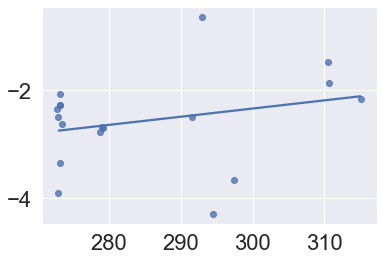

In [105]:
import seaborn as sns
sns.set(font_scale = 2)
ax=sns.regplot(x="bodytemperatureKelvin",y="logMLscore1",data=df,x_jitter=.5,ci=None)


fig=ax.get_figure()
#ax.set_xlabel("Body temperature (K)")
#ax.set_ylabel("Log(MLscore)")
ax.set_xlabel("")
ax.set_ylabel("")
fig.savefig("dogfishes-ML.png")

In [96]:
r=df["bodytemperatureKelvin"].corr(df["logMLscore1"])
r

0.26374554717038956

In [97]:
n=len(df)
n

19

In [98]:
ttest= (r*np.sqrt(n-2)) / np.sqrt(1-r**2)
ttest

1.1273682780775702

In [99]:
df

,sequence,species,bodytemperatureKelvin,invbodytemperatureKelvin,AApairs,MLscore1,MLscore2,logMLscore1,logMLscore2
tr|G1N679,MLCTMSLKDHLIHNVHKEEHPHAHNKISVVGVGAVGMACAISILMK...,Meleagris gallopavo,311,0.003215,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-0.225072,0.141158,NaN,-1.957875
sp|O13276,MSTKEKLIGHVMKEEPIGSRNKVTVVGVGMVGMASAVSILLKDLCD...,Sphyraena argentea,292,0.003425,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.083230,-0.174778,-2.486152,NaN
sp|O13278,MSTKEKLIDHVMKEEPIGSRNKVTVVGVGMVGMASAVSILLKDLCD...,Sphyraena lucasana,294,0.003401,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.013605,-0.104016,-4.297337,NaN
sp|O93537,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILIKDLGD...,Harpagifer antarcticus,273,0.003663,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.020084,-0.115838,-3.907841,NaN
sp|O93538,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Parachaenichthys charcoti,273,0.003663,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.125715,-0.224731,-2.073741,NaN
sp|O93540,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Gobionotothen gibberifrons,273,0.003663,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.035548,-0.128171,-3.336869,NaN
sp|O93541,MSTKEKLISHVMKEEPVGSRSKVTVVGVGMVGMASAISILLKDLCD...,Champsocephalus gunnari,273,0.003663,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.082163,-0.180709,-2.499050,NaN
sp|O93542,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Eleginops maclovinus,279,0.003584,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.067948,-0.165867,-2.689018,NaN
sp|O93544,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Dissostichus mawsoni,273,0.003663,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.072638,-0.170389,-2.622265,NaN
sp|O93545,MSTKEKLISHVMKEEPVGSRSKVTVVGVGMVGMASAISILLKDLCD...,Lindbergichthys nudifrons,273,0.003663,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.095448,-0.193501,-2.349175,NaN
